# Proyecto: Analisis de mercado inmobiliario 

# Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans

import warnings # supress warnings
warnings.filterwarnings('ignore')

# EDA y Preprocesamiento

In [2]:
raw = pd.read_csv(r"A:\DATA SCIENCE\projectos\Sprint 2\dataset\DS_Proyecto_01_Datos_Properati.csv")
raw.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


### Eliminacion de features
- "created_on" parece aportar la misma informacion que "start_date".

- "currency", "l1", y "operation_type" parecen tener la mismo informacion para todas las instancias, por lo que no serian utiles.

- "tittle" y "description" parecen ser diferenten para todas las instancias por lo que tampoco serian utiles.

In [3]:
print(raw.currency.nunique())
print(raw.l1.nunique())
print(raw.operation_type.nunique())

1
1
1


In [4]:
df = raw.drop(columns=["created_on","l1","operation_type","currency","title","description"])

In [5]:
df.count()

start_date         146660
end_date           146660
lat                136735
lon                136701
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
property_type      146660
dtype: int64

In [6]:
#Evaluamos cuales variables son categoricas y cuales son numericas:
var_num = []
var_cat = []

for i in df.columns:
  if df.dtypes[i] != "object":
    var_num.append(i)
  else :
    var_cat.append(i)

print(f"Variables Numericas: {var_num}")
print(f"Variables Categoricas: {var_cat}")

Variables Numericas: ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
Variables Categoricas: ['start_date', 'end_date', 'l2', 'l3', 'property_type']


### Valores Atipicos

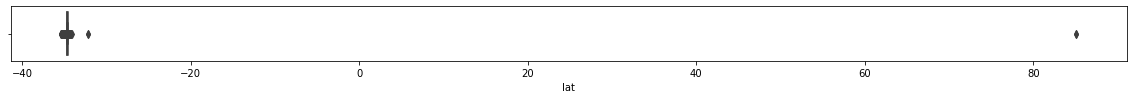

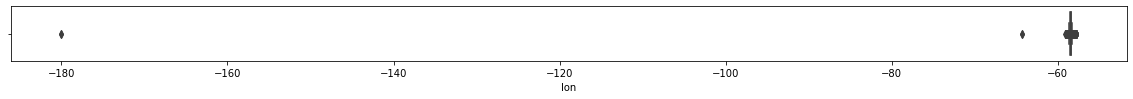

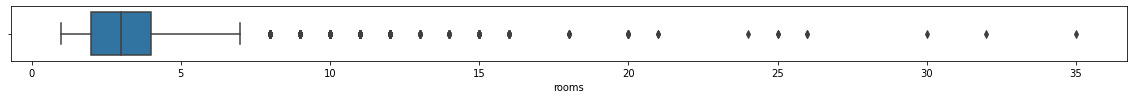

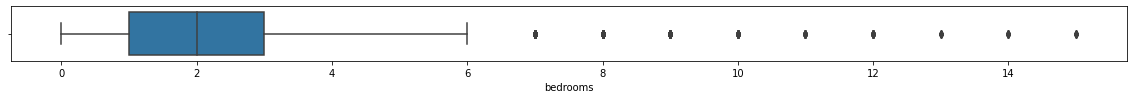

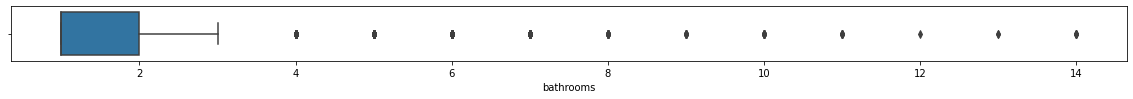

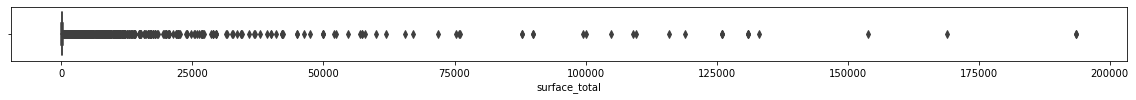

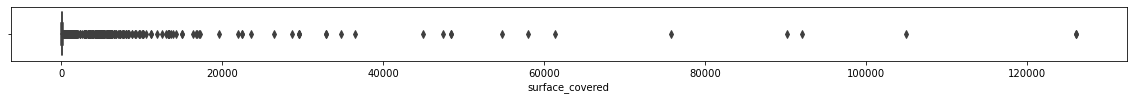

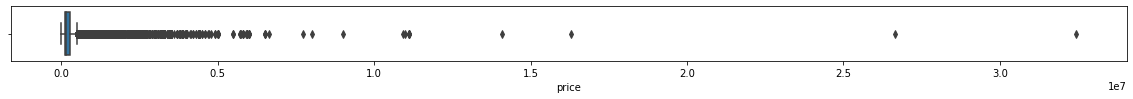

In [7]:
#vemos los outliers de forma general de todas las variables
df_num = df[var_num]
for i in df_num:
    plt.figure(figsize=(20,1))
    sns.boxplot(data=df_num, x=i)

In [8]:
df_num.describe(percentiles=[0.05,0.1,.25,.5,.75,.8,.9,.95,.96,.97,.98,.99,.995,.996,.997])

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
5%,-34.801832,-58.715617,1.000000,1.000000,1.000000,35.000000,33.000000,6.750000e+04
10%,-34.712655,-58.632007,2.000000,1.000000,1.000000,40.000000,37.000000,8.000000e+04
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
80%,-34.564191,-58.400733,4.000000,3.000000,2.000000,168.000000,123.000000,2.980000e+05


In [9]:
df.l2.value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

In [10]:
df.property_type.value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

### Filtrado

In [11]:
df_fil = df[
          (df.lat < 80) & 
          (df.lon > -180) &
          (df.rooms <= 8) & 
          (df.bedrooms <= 6) & 
          (df.bathrooms <= 4) & 
          (df.surface_total <2000) & (df.surface_total > 15) & 
          (df.surface_covered < 2000) & (df.surface_covered > 15) & 
          (df.surface_covered <= df.surface_total) & 
          (df.price <= 500000)  &
          (df.property_type.isin(["Casa","Departamento","PH"]))
          ]

print(df.shape, df_fil.shape)

(146660, 13) (103449, 13)


In [12]:
df_fil.property_type.value_counts()

Departamento    77834
PH              13035
Casa            12580
Name: property_type, dtype: int64

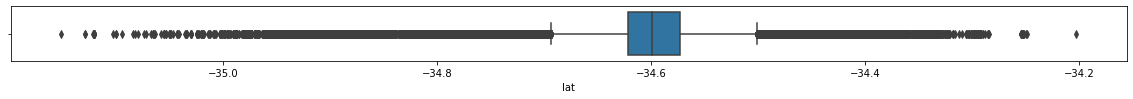

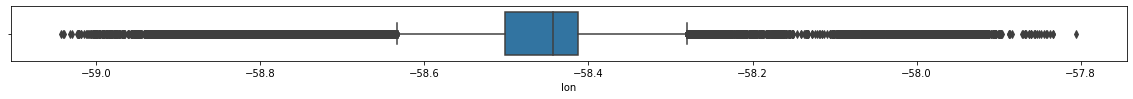

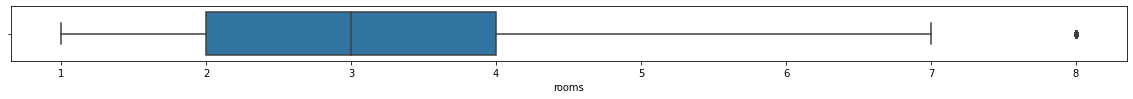

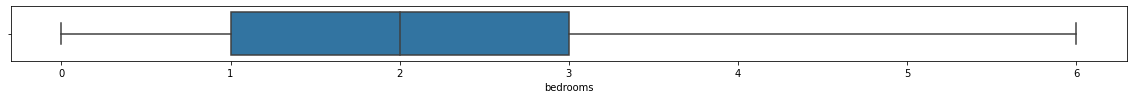

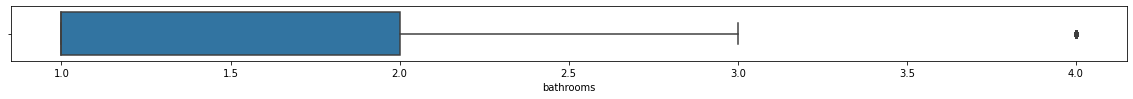

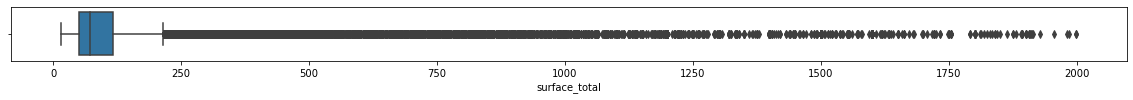

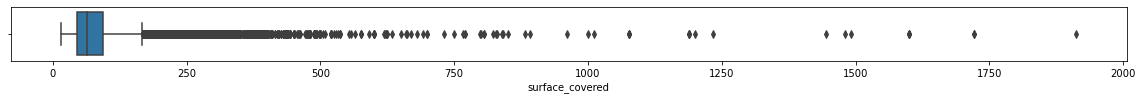

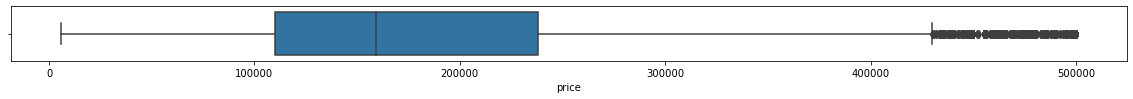

In [13]:
df_num2 = df_fil[var_num]
for i in df_num2:
    plt.figure(figsize=(20,1))
    sns.boxplot(data=df_num2, x=i)

### Valores Faltantes

lat                 9925
lon                 9959
bathrooms           5957
surface_total      20527
surface_covered    21614
dtype: int64

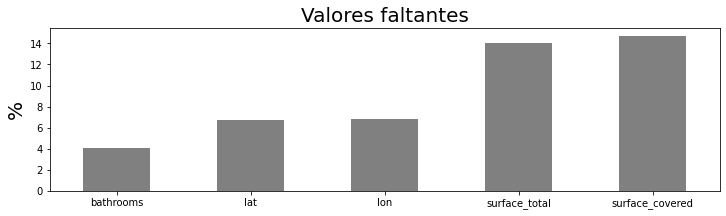

In [14]:
# % de valores faltantes
val_faltantes = df.isna().sum()
val_faltantes = val_faltantes[val_faltantes > 0]
val_faltantes_por = (val_faltantes/ df.shape[0])*100


plt.figure(figsize=(12,3))
plt.title("Valores faltantes", size=20)
plt.ylabel("%",size=20)
val_faltantes_por.sort_values(inplace=True)
val_faltantes_por.plot.bar(color="grey")
plt.xticks(rotation=0)
val_faltantes

In [15]:
# notar que con el filtrado no hay valores faltantes
df_fil.isna().sum()

start_date         0
end_date           0
lat                0
lon                0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [16]:
df_fil.shape

(103449, 13)

In [17]:
out = pd.merge(df, df_fil, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

In [18]:
print(df.shape)
print(df_fil.shape)
print(out.shape)

(146660, 13)
(103449, 13)
(43211, 13)


## DATAFRAME (df_c)

### Transformacion va -> vf
de outliers a valores faltantes

In [19]:
ol = out[var_num]

In [20]:
ol.count()

lat                33286
lon                33252
rooms              43211
bedrooms           43211
bathrooms          37254
surface_total      22684
surface_covered    21597
price              43211
dtype: int64

In [21]:
ol.isna().sum()

lat                 9925
lon                 9959
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
dtype: int64

Reemplazamos por NaN a cada valor de las instancias que se encuentre por fuera de los valores por los que fue filtrada cada feature

In [22]:
for col in ol:
  result = ~ol[col].isin(df_fil[col])
  ol.loc[result, col] = np.nan

In [23]:
ol.isna().sum()

lat                35981
lon                36182
rooms                635
bedrooms             428
bathrooms           7603
surface_total      21926
surface_covered    22606
price              13492
dtype: int64

In [24]:
print(ol.shape)
ol.head(3)

(43211, 8)


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,NaN,NaN,7.0,NaN,2.0,140.0,140.0,153000.0
21,NaN,NaN,2.0,1.0,1.0,53.0,42.0,145000.0
30,NaN,NaN,2.0,1.0,1.0,45.0,45.0,110000.0


In [25]:
print(df_fil.shape)
df_fil.head(3)

(103449, 13)


,start_date,end_date,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,2019-10-17,2019-11-21,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,2019-11-01,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,2019-12-23,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH


In [26]:
df_c = pd.merge(df_fil, ol, how= "outer")
df_c.shape

(146609, 13)

In [27]:
def vf(dataf):
  return dataf.isna().sum()

In [28]:
vf(df_c)

start_date         43032
end_date           43032
lat                35981
lon                36182
l2                 43032
l3                 43032
rooms                635
bedrooms             428
bathrooms           7603
surface_total      21926
surface_covered    22606
price              13492
property_type      43032
dtype: int64

### Imputacion

rooms -> bedrooms

In [29]:
media = df_c[["bedrooms","rooms"]].groupby("rooms").agg(pd.Series.mean)
media = media.to_dict()["bedrooms"]
df_c.set_index("rooms", inplace=True)
df_c.bedrooms.fillna(media, inplace=True)
df_c.reset_index(inplace=True)
vf(df_c)

rooms                635
start_date         43032
end_date           43032
lat                35981
lon                36182
l2                 43032
l3                 43032
bedrooms             203
bathrooms           7603
surface_total      21926
surface_covered    22606
price              13492
property_type      43032
dtype: int64

rooms -> bathrooms

In [30]:
media = df_c[["bathrooms","rooms"]].groupby("rooms").agg(pd.Series.mean)
media = media.to_dict()["bathrooms"]
df_c.set_index("rooms", inplace=True)
df_c.bathrooms.fillna(media, inplace=True)
df_c.reset_index(inplace=True)
vf(df_c)

rooms                635
start_date         43032
end_date           43032
lat                35981
lon                36182
l2                 43032
l3                 43032
bedrooms             203
bathrooms            236
surface_total      21926
surface_covered    22606
price              13492
property_type      43032
dtype: int64

rooms -> surface_covered

In [31]:
media = df_c[["surface_covered","rooms"]].groupby("rooms").agg(pd.Series.mean)
media = media.to_dict()["surface_covered"]
df_c.set_index("rooms", inplace=True)
df_c.surface_covered.fillna(media, inplace=True)
df_c.reset_index(inplace=True)
vf(df_c)

rooms                635
start_date         43032
end_date           43032
lat                35981
lon                36182
l2                 43032
l3                 43032
bedrooms             203
bathrooms            236
surface_total      21926
surface_covered      210
price              13492
property_type      43032
dtype: int64

surface_covered -> surface_total

In [32]:
media = df_c[["surface_total","surface_covered"]].groupby("surface_covered").agg(pd.Series.mean)
media = media.to_dict()["surface_total"]
df_c.set_index("surface_covered", inplace=True)
df_c.surface_total.fillna(media, inplace=True)
df_c.reset_index(inplace=True)

In [33]:
df_c.shape

(146609, 13)

### Encoding
Reemplazamos los nombres de los barrios por el precio promedio de su metro cuadrado.

In [34]:
# Creamos la variable m2(despues hay que dropearla por que es un leack)
df_c["m2"] = df_c.price / df_c.surface_covered

In [35]:
media = df_c[["m2","l3"]].groupby("l3").agg(pd.Series.mean)
media = media.to_dict()["m2"]
media

{'Abasto': 2636.30406035851,
 'Agronomía': 2742.6214440158888,
 'Almagro': 2679.4021537046556,
 'Almirante Brown': 1118.4538647701702,
 'Avellaneda': 1616.1636047553752,
 'Balvanera': 2227.7227736127097,
 'Barracas': 2529.1074930293207,
 'Barrio Norte': 3310.802211525997,
 'Belgrano': 3569.84708789419,
 'Berazategui': 1727.6191612070486,
 'Boca': 1899.7916863536666,
 'Boedo': 2352.3591503452103,
 'Caballito': 2815.1117098114205,
 'Catalinas': 2143.7130996392466,
 'Cañuelas': 1363.2005929804236,
 'Centro / Microcentro': 2387.362513483653,
 'Chacarita': 2717.9580261386477,
 'Coghlan': 3219.917222715919,
 'Colegiales': 3165.832698561738,
 'Congreso': 2255.3687829752134,
 'Constitución': 1809.7333421652738,
 'Escobar': 1361.8956941585805,
 'Esteban Echeverría': 1252.3520182021034,
 'Ezeiza': 1499.9269996520184,
 'Florencio Varela': 1301.5209046855816,
 'Flores': 2319.6533717807324,
 'Floresta': 2107.790606928082,
 'General Rodríguez': 1195.4618144355104,
 'General San Martín': 1545.9039038

In [36]:
df_c.l3 = df_c.l3.map(media)

In [37]:
df_c.drop(columns="m2", inplace=True)
df_c.head(4)

,surface_covered,rooms,start_date,end_date,lat,lon,l2,l3,bedrooms,bathrooms,surface_total,price,property_type
0,58.0,2.0,2019-10-17,2019-11-21,-34.624056,-58.412110,Capital Federal,2352.359150,1.0,2.0,70.0,159000.0,PH
1,45.0,2.0,2019-10-17,2019-11-01,-34.593569,-58.427474,Capital Federal,3563.457777,1.0,1.0,45.0,125000.0,PH
2,45.0,2.0,2019-09-21,2019-10-12,-34.593569,-58.427474,Capital Federal,3563.457777,1.0,1.0,45.0,125000.0,PH
3,45.0,2.0,2019-05-20,2019-06-08,-34.593569,-58.427474,Capital Federal,3563.457777,1.0,1.0,45.0,125000.0,PH


In [38]:
df_c.l3.describe(percentiles=[0.05,0.1,.25,.5,.75,.8,.9,.95,.96,.97,.98,.99])

count    103577.000000
mean       2598.792784
std         732.939998
min         892.771999
5%         1432.567054
10%        1551.736359
25%        2107.790607
50%        2687.660529
75%        3165.832699
80%        3310.802212
90%        3563.457777
95%        3569.847088
96%        3569.847088
97%        3569.847088
98%        3569.847088
99%        3569.847088
max        5532.966790
Name: l3, dtype: float64

In [39]:
df_c.l3 = df_c.l3.loc[(df_c.l3 > 1500) & (df_c.l3 < 4000)]

In [40]:
df_c.l3.describe()

count    95904.000000
mean      2682.971555
std        640.305076
min       1532.426683
25%       2227.722774
50%       2687.660529
75%       3236.220683
max       3950.905537
Name: l3, dtype: float64

In [41]:
cuantis  = pd.qcut(df_c.l3, 5, labels=["Q1","Q2","Q3","Q4","Q5"])

In [42]:
cuantis.dropna(inplace=True)
cuantis.isna().sum()

0

In [43]:
df_c["categoria"] = cuantis

In [44]:
df_c = df_c[df_c.property_type.isin(["Casa","Departamento","PH"])]

In [45]:
df_c = pd.get_dummies(df_c, columns=["l2","property_type","categoria"]).reset_index(drop= True)

In [46]:
df_c.drop(columns=["l3"], inplace=True)

In [47]:
print(df_c.shape)
df_c.head(1)

(103577, 22)


,surface_covered,rooms,start_date,end_date,lat,lon,bedrooms,bathrooms,surface_total,price,...,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal,property_type_Casa,property_type_Departamento,property_type_PH,categoria_Q1,categoria_Q2,categoria_Q3,categoria_Q4,categoria_Q5
0,58.0,2.0,2019-10-17,2019-11-21,-34.624056,-58.41211,1.0,2.0,70.0,159000.0,...,0,1,0,0,1,0,1,0,0,0


Por ultimo vamos a encodear "start_date" y "end_date", para luego tambien crear una variable de su diferencia, a la cual llamaremos "duracion" refiriendose a cuanto duro la publicacion.

In [48]:
df_c.start_date = pd.to_datetime(df_c.start_date, errors = 'coerce',format="%Y-%m-%d")
df_c.end_date = pd.to_datetime(df_c.end_date, errors = 'coerce',format="%Y-%m-%d")

print(df_c.start_date.dt.year.value_counts())
print(df_c.end_date.dt.year.value_counts())

2019    96811
2020     6766
Name: start_date, dtype: int64
2019.0    83913
2020.0    12529
Name: end_date, dtype: int64


Vamos a eliminar las instancias del 2020 por posibles cambios drasticos en los precios de las propiedades debidos a la pandemia

In [49]:
filt = (df_c.start_date < pd.to_datetime("2020-01-01")) & (df_c.end_date < pd.to_datetime("2020-01-01"))
df_c = df_c.loc[filt]

In [50]:
print(df_c.start_date.dt.year.value_counts())
print(df_c.end_date.dt.year.value_counts())

2019    83913
Name: start_date, dtype: int64
2019    83913
Name: end_date, dtype: int64


In [51]:
print(vf(df_c.start_date))
print(vf(df_c.end_date))

0
0


Vamos a crear una nueva variable "duracion" que mida en dias la duracion de la publicacion. Podriamos suponer que a medida que la duracion es mayor la propiedad esta sobrevalorada y vizceversa.

In [52]:
df_c["duracion"] = (df_c.end_date - df_c.start_date).dt.days

In [53]:
media_dur = df_c[["price","duracion"]].groupby("duracion").agg(pd.Series.mean)
media_dur.reset_index(inplace=True)
media_dur

,duracion,price
0,0,180316.598930
1,1,190405.002334
2,2,177733.321522
3,3,184887.963004
4,4,181310.437126
...,...,...
317,340,135000.000000
318,344,235000.000000
319,349,392666.666667
320,355,320000.000000


<AxesSubplot:xlabel='duracion', ylabel='price'>

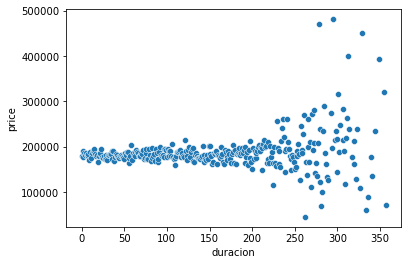

In [54]:
sns.scatterplot(x=media_dur.duracion, y=media_dur.price)

En el grafico de dispersion se puede ver que la variacion del precio parece aumentar cuanto mayor es la duracion.

In [55]:
df_c.start_date = df_c.start_date.dt.month
df_c.end_date = df_c.end_date.dt.month

In [56]:
df_c.isna().sum()

surface_covered                0
rooms                          0
start_date                     0
end_date                       0
lat                            0
lon                            0
bedrooms                       0
bathrooms                      0
surface_total                  0
price                          0
l2_Bs.As. G.B.A. Zona Norte    0
l2_Bs.As. G.B.A. Zona Oeste    0
l2_Bs.As. G.B.A. Zona Sur      0
l2_Capital Federal             0
property_type_Casa             0
property_type_Departamento     0
property_type_PH               0
categoria_Q1                   0
categoria_Q2                   0
categoria_Q3                   0
categoria_Q4                   0
categoria_Q5                   0
duracion                       0
dtype: int64

### Escalado

In [57]:
X = df_c.drop(columns=["price"])
y = df_c.price

In [58]:
escalador = StandardScaler()

In [59]:
X_escalado = escalador.fit_transform(X)
X_escalado

array([[-0.36210168, -0.80732681,  1.24202916, ..., -0.52222637,
        -0.43428456, -0.23226593],
       [-0.59588793, -0.80732681,  1.24202916, ..., -0.52222637,
         2.30263771, -0.61691008],
       [-0.59588793, -0.80732681,  0.92244523, ..., -0.52222637,
         2.30263771, -0.50151683],
       ...,
       [-0.77572352, -1.66757259,  0.28327736, ..., -0.52222637,
        -0.43428456, -0.63614229],
       [-0.72177284, -0.80732681,  0.28327736, ..., -0.52222637,
        -0.43428456, -0.63614229],
       [-0.05638119,  0.05291896,  0.28327736, ..., -0.52222637,
        -0.43428456,  0.49855796]])

### PCA

In [60]:
pca = PCA(n_components=13)
pca.fit(X_escalado)
pca.explained_variance_ratio_

array([0.21328268, 0.13690003, 0.11113642, 0.08737664, 0.07003704,
       0.06086477, 0.05602765, 0.05230074, 0.04482543, 0.04429494,
       0.03522842, 0.02226686, 0.01840348])

In [61]:
cumulative_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))
cumulative_variance

array([0.213, 0.35 , 0.461, 0.548, 0.618, 0.679, 0.735, 0.787, 0.832,
       0.876, 0.911, 0.933, 0.951])

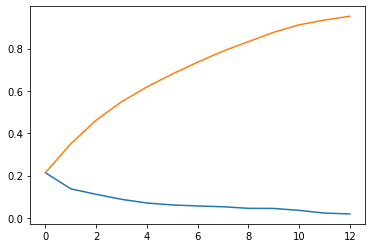

In [62]:
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [63]:
X_escalado.shape

(83913, 22)

In [64]:
df_pca = pca.transform(X_escalado)
df_pca = pd.DataFrame(df_pca)
df_pca.shape

(83913, 13)

##  DATAFRAME (df_d)

### Filtrado

In [65]:
df_d = df[
          (df.lat < 80) & 
          (df.lon > -180) &
          (df.rooms <= 13) & 
          (df.bedrooms <= 8) & 
          (df.bathrooms <= 14) & 
          (df.surface_total <2000) & (df.surface_total > 15) & 
          (df.surface_covered < 2000) & (df.surface_covered > 15) & 
          (df.surface_covered <= df.surface_total) & 
          (df.price <= 500000)  &
          (df.property_type.isin(["Departamento"])) &
          (df.l2 == "Capital Federal")
          ]
print(df_d.shape)
df_d.isna().sum()

(59212, 13)


start_date         0
end_date           0
lat                0
lon                0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

### Encoding

In [66]:
df_d["m2"] = df_d.price / df_d.surface_covered
media2 = df_d[["m2","l3"]].groupby("l3").agg(pd.Series.mean)
media2 = media2.to_dict()["m2"]
df_d.l3 = df.l3.map(media2)
df_d.drop(columns="m2", inplace=True)

In [67]:
df_d.l3.describe()

count    59212.000000
mean      3008.535936
std        543.755797
min       1010.690219
25%       2721.181087
50%       2871.343361
75%       3593.571416
max       5551.907366
Name: l3, dtype: float64

In [68]:
cuantis2  = pd.qcut(df_d.l3, 5, labels=["Q1","Q2","Q3","Q4","Q5"])

In [69]:
df_d["cat"] = cuantis2

In [70]:
df_d.drop(columns=["start_date","end_date","l2","l3","property_type"], inplace=True)

In [71]:
df_d = pd.get_dummies(df_d, columns=["cat"]).reset_index(drop= True)

In [72]:
print(df_d.shape)
df_d.head(1)

(59212, 13)


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,cat_Q1,cat_Q2,cat_Q3,cat_Q4,cat_Q5
0,-34.60588,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,1,0,0,0,0


In [73]:
df_d.isna().sum()

lat                0
lon                0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
cat_Q1             0
cat_Q2             0
cat_Q3             0
cat_Q4             0
cat_Q5             0
dtype: int64

# Anterior vs Nuevo
En el Sprint Project 01 usamos un DecisionTreeRegressor de max_depth=9, vamos a probarlo con el nuevo dataset transformado. Podriamos considerar este modelo como el punto de partida a mejorar.

#### Funciones para evaluar modelos

In [74]:
#Definimos una funcion que logra evaluar el desempeño de los modelos.

def model_ev(X_train, X_test, y_train, y_test, model):

  global mae_train, mae_test, rmse_train, rmse_test, r_squared_tra, adjusted_r_squared_tra,r_squared_te, adjusted_r_squared_te, y_test_pred,y_train_pred
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train) 
  y_test_pred = model.predict(X_test)

  
  # Calculo de RMSE 
  rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
  print(f'RMSE Train: {rmse_train}\n')
  print(f'RMSE Test: {rmse_test}\n')

  # Calculo de mae 
  mae_train = mean_absolute_error(y_train,y_train_pred)
  mae_test = mean_absolute_error(y_test, y_test_pred)
  print(f'MAE Train: {mae_train}\n')
  print(f'MAE Test: {mae_test}\n')

   #Histograma de los errores (y - y_predicho) para cada conjunto:
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)
  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
  sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
  plt.xlabel('errores')
  plt.legend()

  #Scatter de y vs y-predicho para lo testeado:
  ax = plt.subplot(1,2,2)
  ax.scatter(y_test,y_test_pred, s =2)
      
  lims = [
      np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
      np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
      ]
      
  ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
  plt.xlabel('y (test)')
  plt.ylabel('y_pred (test)')
  plt.tight_layout()
  plt.show()

In [75]:
#Definimos una funcion que devuelva un dataframe con los datos obtenidos de la evaluacion de los modelos.
def resultados(n,var,model, hp):  
  dataf = pd.DataFrame({
                       "nº Instancias": n,
                       "nº Variables":var,
                       "Modelo": model, 
                       "HP": hp,
                       "mae_train":[mae_train],
                       "mae_test":[mae_test],
                      })
  return dataf

### Modelo DTR (df_fil)

In [76]:
X_fil = df_fil.drop(columns=["price","start_date","end_date","l2","l3","property_type"])
y = df_fil.price

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_fil,y,test_size=0.3, random_state=42)
tree = DecisionTreeRegressor(max_depth=9)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

RMSE Train: 45913.59339073957

RMSE Test: 48473.21030631754

MAE Train: 32253.738664716228

MAE Test: 33730.619396187314



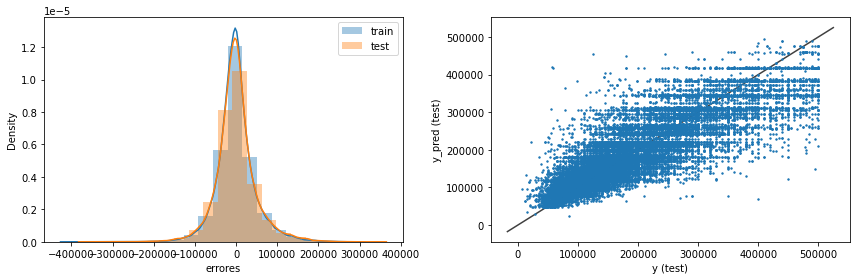

In [78]:
model_ev(X_train,X_test,y_train,y_test, tree)

In [79]:
dtr_fil = resultados(df_fil.shape[0],df_fil.shape[1],"DTR_fil", "max_depth=9")
dtr_fil

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,103449,13,DTR_fil,max_depth=9,32253.738665,33730.619396


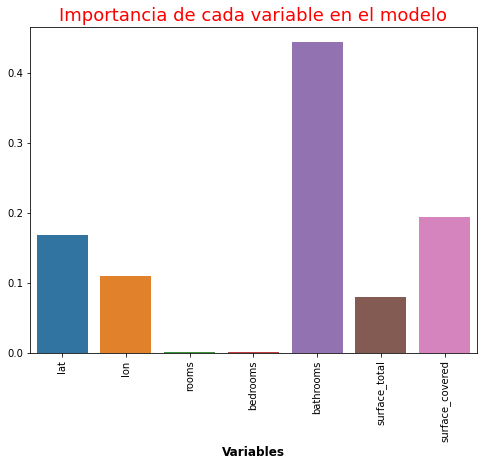

In [80]:
imp_variables = tree.feature_importances_

plt.figure(figsize = (8, 6))
sns.barplot(X_fil.columns, imp_variables)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

### Modelo DTR (df_c)

In [81]:
X_c = df_c.drop(columns=["price"])
y = df_c.price

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_c,y,test_size=0.3, random_state=42)
tree = DecisionTreeRegressor(max_depth=9)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

RMSE Train: 43564.067358607324

RMSE Test: 46109.85270828873

MAE Train: 30602.230876454447

MAE Test: 32175.61366735743



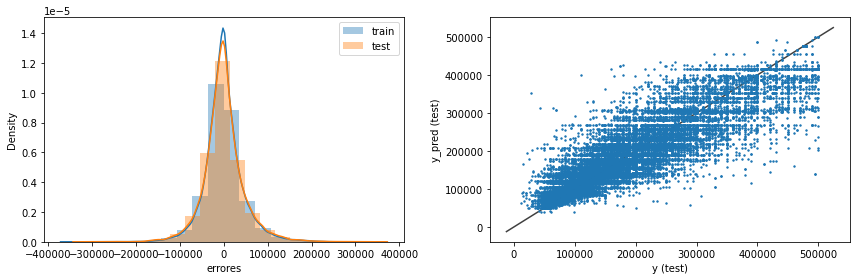

In [83]:
model_ev(X_train,X_test,y_train,y_test, tree)

In [84]:
dtr_nuevo = resultados(df_c.shape[0],df_c.shape[1],"DTR_c", "max_depth=9")
dtr_nuevo

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,83913,23,DTR_c,max_depth=9,30602.230876,32175.613667


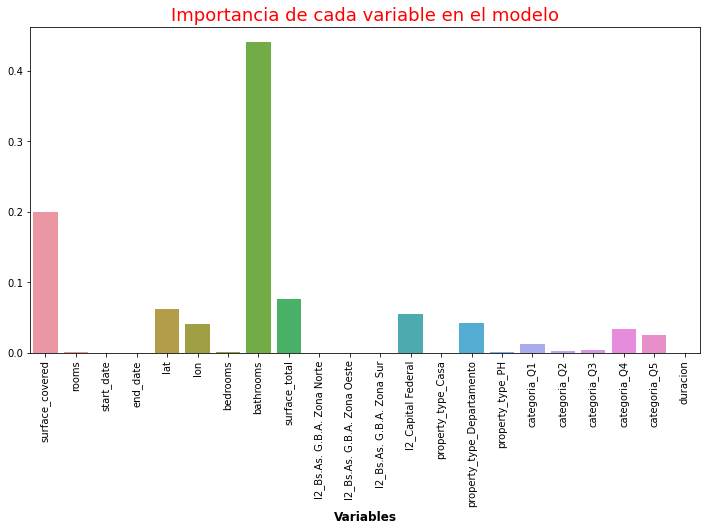

In [85]:
imp_variables = tree.feature_importances_

plt.figure(figsize = (12, 6))
sns.barplot(X_c.columns, imp_variables)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

### Modelo DTR (PCA)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(df_pca,y,test_size=0.3, random_state=42)
tree = DecisionTreeRegressor(max_depth=9)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

RMSE Train: 51027.75602318143

RMSE Test: 55320.600562462445

MAE Train: 36363.963756633624

MAE Test: 38902.946350806196



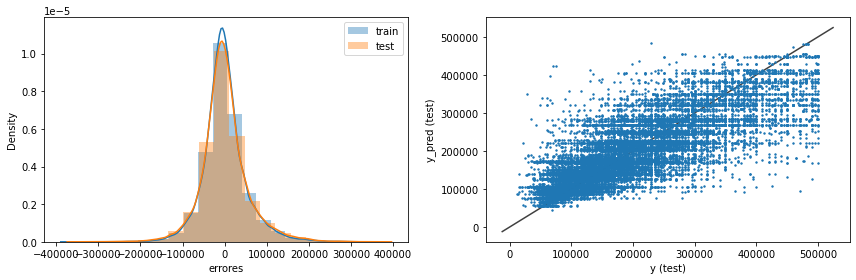

In [87]:
model_ev(X_train,X_test,y_train,y_test, tree)

In [88]:
dtr_pca = resultados(df_pca.shape[0],df_pca.shape[1],"DTR(PCA)", "max_depth=9")
dtr_pca

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,83913,13,DTR(PCA),max_depth=9,36363.963757,38902.946351


### Modelo DTR (df_d)

In [89]:
X_d = df_d.drop(columns=["price","surface_covered"])
y = df_d.price

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_d,y,test_size=0.3, random_state=42)
tree = DecisionTreeRegressor(max_depth=9)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

RMSE Train: 37310.34433505351

RMSE Test: 39505.16710738921

MAE Train: 25981.876816491564

MAE Test: 27339.92666971605



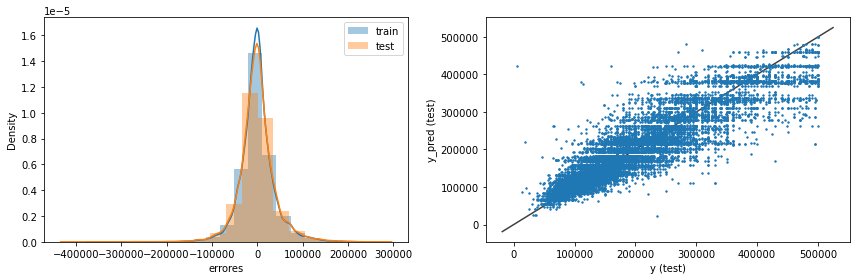

In [91]:
model_ev(X_train,X_test,y_train,y_test, tree)

In [92]:
dtr_d = resultados(df_d.shape[0],df_d.shape[1],"DTR_reducido", "max_depth=9")
dtr_d

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,59212,13,DTR_reducido,max_depth=9,25981.876816,27339.92667


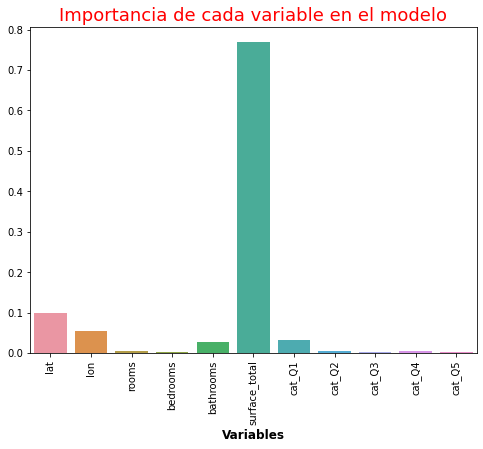

In [93]:
imp_variables = tree.feature_importances_

plt.figure(figsize = (8, 6))
sns.barplot(X_d.columns, imp_variables)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

### Modelo DTR Anterior

In [94]:
clases_abundantes = ["Departamento","PH","Casa"]

f1 = raw[(raw.l2 == "Capital Federal")]
f2 = f1[f1.property_type.isin(clases_abundantes)]
f3 = f2[(f2.surface_total <= 1000) & (f2.surface_total >= 15)]
f4 = f3[f3.price <= 4000000]
f5 = f4[["lat","lon","surface_covered","price"]]
df_ml = f5.dropna()

In [95]:
df_ml

,lat,lon,surface_covered,price
0,-34.605880,-58.384949,140.0,153000.0
1,-34.624056,-58.412110,58.0,159000.0
2,-34.593569,-58.427474,45.0,125000.0
3,-34.581294,-58.436754,50.0,295000.0
5,-34.593779,-58.441239,56.0,150000.0
...,...,...,...,...
146553,-34.581308,-58.431236,100.0,620000.0
146554,-34.585355,-58.427194,111.0,570000.0
146555,-34.585355,-58.427194,134.0,480000.0
146556,-34.584134,-58.436389,143.0,530000.0


In [96]:
X = df_ml.drop(columns="price")
y = df_ml.price

RMSE Train: 99592.95671758761

RMSE Test: 112349.14043010845

MAE Train: 47512.91325334378

MAE Test: 50331.702879643584



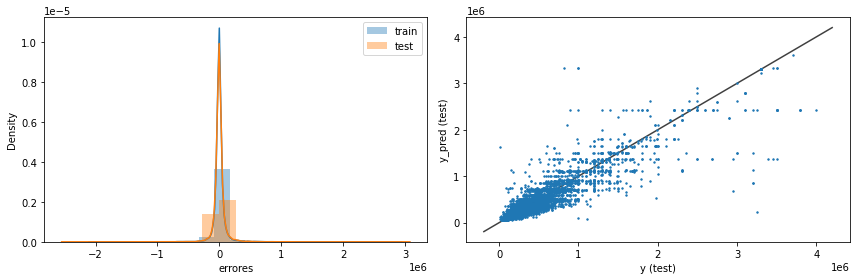

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
tree.fit(X_train,y_train)
model_ev(X_train,X_test,y_train,y_test, tree)
dtr_viejo = resultados(df_ml.shape[0], df_ml.shape[1], "DTR","max_depth=9")

### Resultados

In [98]:
diferencia = pd.concat([dtr_viejo,dtr_fil, dtr_nuevo,dtr_d,dtr_pca])
diferencia.reset_index(drop=True)

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,77601,4,DTR,max_depth=9,47512.913253,50331.702880
1,103449,13,DTR_fil,max_depth=9,32253.738665,33730.619396
2,83913,23,DTR_c,max_depth=9,30602.230876,32175.613667
3,59212,13,DTR_reducido,max_depth=9,25981.876816,27339.926670
4,83913,13,DTR(PCA),max_depth=9,36363.963757,38902.946351


### Interpretacion

Para comparar los resultados utilizaremos la metrica MAE sobre el conjunto test. La idea era comparar el resultado del modelo utilizado anteriormente contra nuevos preprocesamientos del mismo dataset. Para esto, probe diferentes conjuntos.

- Conjunto 0: Modelo anterior con el que se compararan los nuevos.

- Conjunto 1 (df_fil) : Es simplemente un filtrado de los datos.

- Conjunto 2 (df_c) : Este conjunto se ha filtrado como el anterior, pero esos datos filtrados se han imputado posteriormente. Ademas se han aplicado tecnicas de encoding para formar nuevas variables numericas a partir de variables categoricas. Estas fueron "l2" y "property_type", a las que se les aplico un "get_dummies", y "l3","start_date" y "end_date", con las que luego se crearon nuevas variables ("cat" y "duracion").
Si bien tuvo una mejora comparado al modelo anterior no fue muy significante.

- Conjunto 3(df_d) : Este conjunto tiene el mismo filtrado que el anterior con la diferencia de que solo incluye las propiedades que son departamentos que sean de Capital Federal. No se realizo ninguna imputacion de datos, sino que solamente se utilizo el encoding de "cat" (que fue el que mas mejoro el modelo).

- Conjunto 4 (df_pca) : Basicamente es el conjunto df_c al que se le aplico estandarizando y luego PCA.

**Eleccion**   : El conjunto df_d fue el de menor error por lo que vamos a elegirlo. Hay que tener en cuenta que este modelo solo serviria para predecir el precio de propiedades que sean departamentos ubicados en Capital Federal de un precio igual o menor a 500000 dolares, y demas limitaciones.

**¿A que se debe la mejora del modelo?** : Se debe al preprocesamiento utilizado en el dataframe df_d. Este fue un filtrado arbitrario de outliers, y un encoding para crear variables que categoricen los barrios en funcion del precio promedio del metro cuadrado de sus propiedades.

In [99]:
mejora =((diferencia.mae_test.iloc[0]  - diferencia.mae_test.iloc[3])/diferencia.mae_test.iloc[0])*100
print(f"El modelo mejoro un {mejora} %")


El modelo mejoro un 45.68050531671252 %


# Modelos Avanzados

In [100]:
X = df_d.drop(columns=["price"])
y = df_d.price

## Random Forest

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Benchmark

In [102]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

RMSE Train: 10833.620471173761

RMSE Test: 26310.723797919083

MAE Train: 6358.381351819452

MAE Test: 14734.084864199573



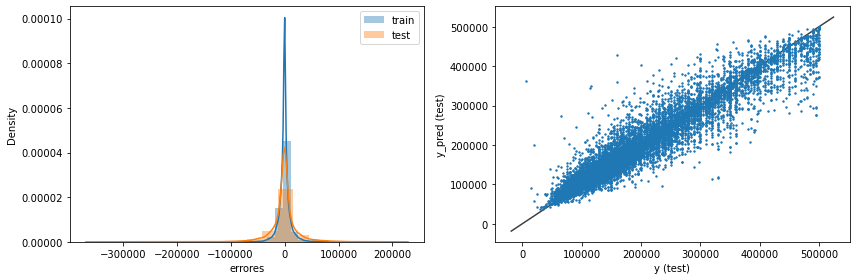

In [103]:
model_ev(X_train, X_test, y_train, y_test,rf)

#### Resultado

In [104]:
rf_bench_res = resultados(df_d.shape[0], df_d.shape[1], "RandomForest_bench", "max_depth= None")
rf_bench_res

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,59212,13,RandomForest_bench,max_depth= None,6358.381352,14734.084864


### Optimizacion de hp

In [105]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 150, num = 2)]
max_features = np.arange(3,8)
max_depth = [int(x) for x in np.linspace(8, 12, num = 4)]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}
print(random_grid)

{'n_estimators': [100, 150], 'max_features': array([3, 4, 5, 6, 7]), 'max_depth': [8, 9, 10, 12]}


In [106]:
# rf = RandomForestRegressor(criterion="mse")
# rf_random = RandomizedSearchCV(estimator = rf, 
# param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(X_train, y_train)

In [107]:
# rf_random.best_params_

### Modelo (df_d)

RMSE Train: 31582.887872218576

RMSE Test: 34131.648587361255

MAE Train: 22035.653255173223

MAE Test: 23616.93854286373



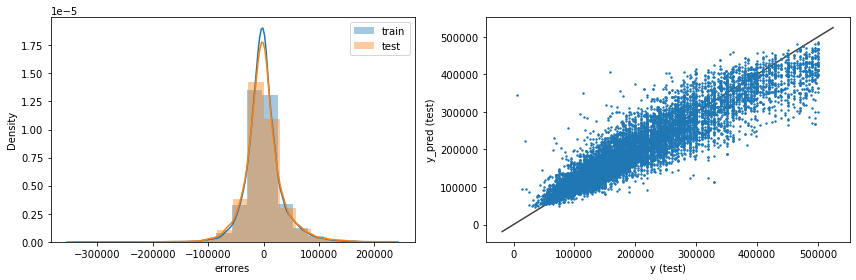

In [108]:
rf_opt = RandomForestRegressor(n_estimators=150,
                           max_depth=10,
                           max_features=7,
                           min_samples_leaf=2,
                           min_samples_split=5)
rf_opt.fit(X_train,y_train)
model_ev(X_train,X_test,y_train,y_test,rf_opt)

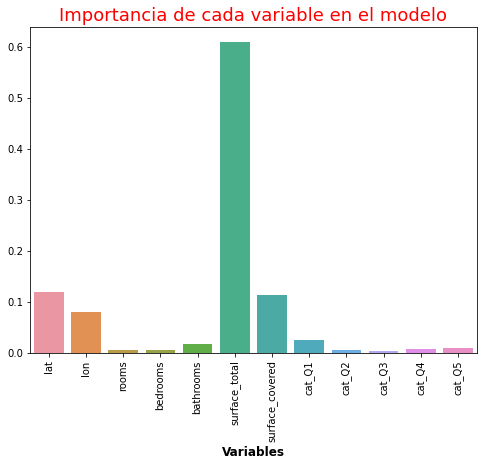

In [109]:
imp_variables = rf.feature_importances_

plt.figure(figsize = (8, 6))
sns.barplot(X.columns, imp_variables)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

#### Resultado

In [110]:
rf_res = resultados(df_d.shape[0], df_d.shape[1], "RandomForest_d","max_depth=10 y optimizado")
rf_res

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,59212,13,RandomForest_d,max_depth=10 y optimizado,22035.653255,23616.938543


### Modelo (df_c)

RMSE Train: 12647.1137604222

RMSE Test: 33298.41346628042

MAE Train: 7427.019852880545

MAE Test: 19694.442701649576



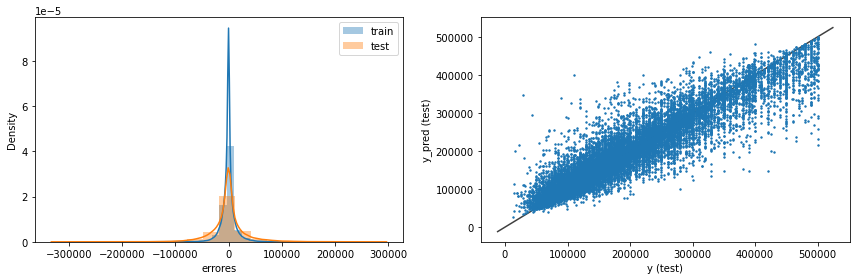

In [111]:
X = df_c.drop(columns=["price"])
y = df_c.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
rf_c = RandomForestRegressor(random_state = 42)
rf_c.fit(X_train,y_train)
model_ev(X_train, X_test, y_train, y_test,rf_c)

In [112]:
# scores = cross_val_score(rf_c, X, y, cv=10, scoring='neg_mean_absolute_error')
# scores.mean()*-1

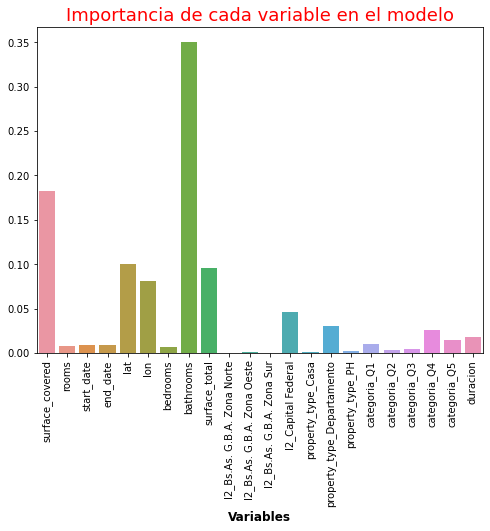

In [113]:
imp_variables = rf_c.feature_importances_

plt.figure(figsize = (8, 6))
sns.barplot(X.columns, imp_variables)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

#### Resultado

In [114]:
rf_c_res = resultados(df_c.shape[0], df_c.shape[1], "RandomForest_c","max_depth= None")
rf_c_res

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,83913,23,RandomForest_c,max_depth= None,7427.019853,19694.442702


#### Modelo Optimizado

RMSE Train: 39871.1697413498

RMSE Test: 42717.32364224017

MAE Train: 28264.521597888786

MAE Test: 29975.315816410177



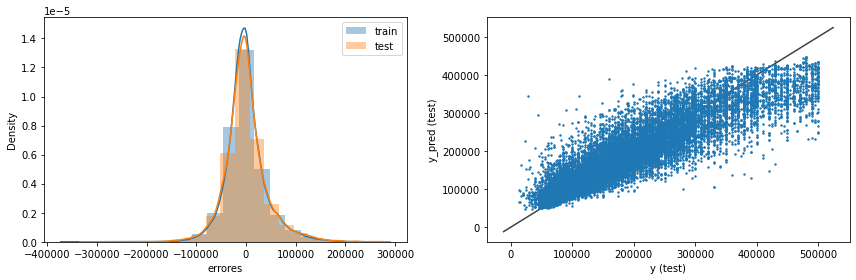

In [115]:
X = df_c.drop(columns=["price"])
y = df_c.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
rf_c_opt = RandomForestRegressor(random_state = 42,
                            n_estimators=150,
                           max_depth=10,
                           max_features=7,
                           min_samples_leaf=2,
                           min_samples_split=5)

rf_c_opt.fit(X_train,y_train)
model_ev(X_train, X_test, y_train, y_test,rf_c_opt)

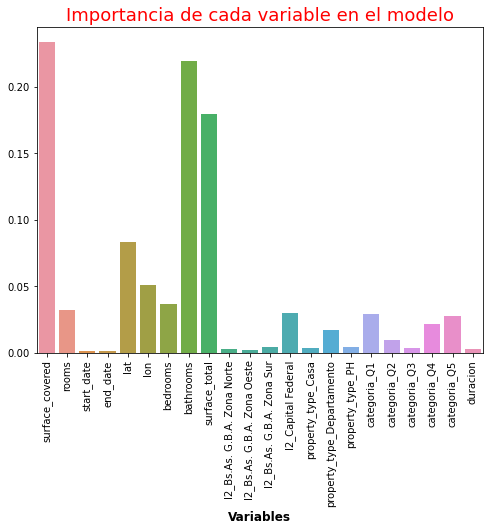

In [116]:
imp_variables = rf_c_opt.feature_importances_

plt.figure(figsize = (8, 6))
sns.barplot(X.columns, imp_variables)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.xticks(rotation=90, size=10)
plt.show()

In [117]:
rf_c_opt_res = resultados(df_c.shape[0], df_c.shape[1], "RandomForest_c_opt","max_depth=10 y optimizado")
rf_c_opt_res

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,83913,23,RandomForest_c_opt,max_depth=10 y optimizado,28264.521598,29975.315816


## Regresion Lineal

### Benchmark

In [118]:
X = df_d.drop(columns=["price"])
y = df_d.price

#Estandarizado
X_1 = escalador.fit_transform(X)
#PolynomialFeatures
poly = PolynomialFeatures(2, include_bias=False)
X = poly.fit_transform(X_1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [119]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

RMSE Train: 42161.47833660319

RMSE Test: 42603.153226126335

MAE Train: 30007.76943398958

MAE Test: 30267.47112136906



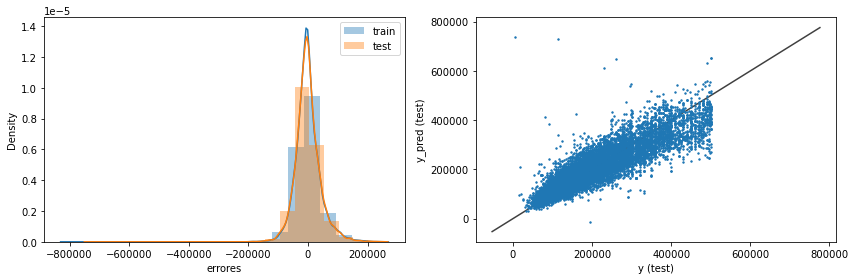

In [120]:
model_ev(X_train,X_test,y_train,y_test, lr)

#### Resultado

In [121]:
lr_res = resultados(df_d.shape[0],df_d.shape[1],"Regresion lineal simple","-")
lr_res

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,59212,13,Regresion lineal simple,-,30007.769434,30267.471121


### Ridge

#### Optimizacion de hp

In [122]:
cv = KFold(n_splits=2, shuffle=True, random_state=42)
param_grid = {"alpha" : np.array([18,20,22])}
#(se hicieron varias busquedas del valor de alpha para saber cual era el mejor valor)
ridge = linear_model.Ridge()

In [123]:
random_grid = RandomizedSearchCV(estimator=ridge,param_distributions=param_grid,
                                 n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1) 

In [124]:
random_grid.fit(X_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


RandomizedSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': array([18, 20, 22])},
                   random_state=42, verbose=2)

In [125]:
random_grid.best_params_

{'alpha': 22}

#### Modelo

RMSE Train: 42161.85209975861

RMSE Test: 42593.53330368734

MAE Train: 30010.568062098686

MAE Test: 30268.942686440307



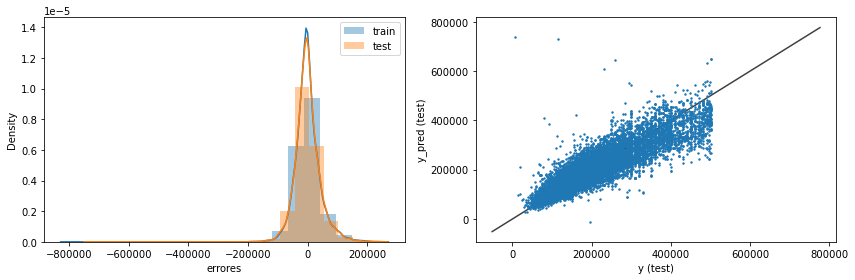

In [126]:
ridge = linear_model.Ridge(alpha=22)
ridge.fit(X_train,y_train)
model_ev(X_train,X_test,y_train,y_test, ridge)

##### Resultado

In [127]:
ridge_res = resultados(df_d.shape[0],df_d.shape[1],"Ridge","alpha=20")
ridge_res

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,59212,13,Ridge,alpha=20,30010.568062,30268.942686


### Lasso

#### Optimizacion de hp

In [128]:
cv = KFold(n_splits=2, shuffle=True, random_state=42)
param_grid = {"alpha" : np.array([0.01,0.1,1,5,50,100,300])}
#(se hicieron varias busquedas del valor de alpha para saber cual era el mejor valor)
lasso = linear_model.Lasso()

In [129]:
# random_grid = RandomizedSearchCV(estimator=lasso,param_distributions=param_grid,
#                                  n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1) 

In [130]:
# random_grid.fit(X_train, y_train)

#### Modelo

RMSE Train: 42164.25884575732

RMSE Test: 42594.86221940089

MAE Train: 30011.07647589075

MAE Test: 30271.46389051095



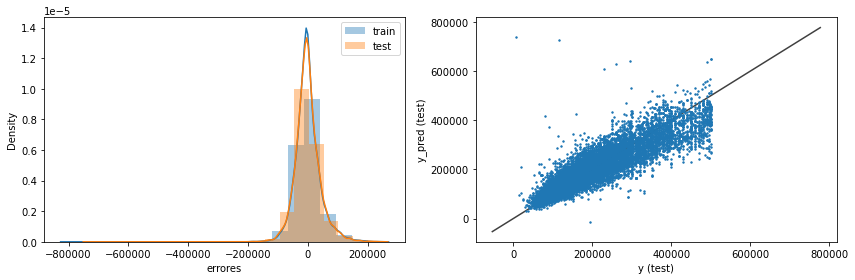

In [131]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
model_ev(X_train,X_test,y_train,y_test, lasso)

##### Resultado

In [132]:
lasso_res = resultados(df_d.shape[0],df_d.shape[1],"Lasso","alpha=0.1")
lasso_res

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,59212,13,Lasso,alpha=0.1,30011.076476,30271.463891


## XG Boost

In [133]:
X = df_d.drop(columns=["price"])
y = df_d.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Benchmark

RMSE Train: 26317.460754659824

RMSE Test: 31148.26294256016

MAE Train: 18253.315949870546

MAE Test: 20979.869623518774



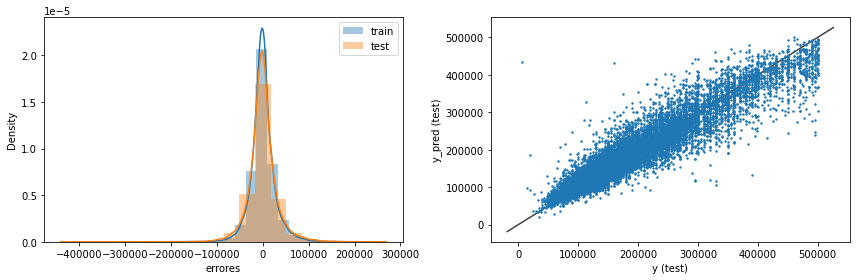

In [134]:
xg = xgb.XGBRegressor()
xg.fit(X_train,y_train)
model_ev(X_train,X_test,y_train,y_test, xg)

#### Resultado

In [135]:
xg_bench_res = resultados(df_d.shape[0],df_d.shape[1],"XGBoost_bench","no optimizados")
xg_bench_res

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,59212,13,XGBoost_bench,no optimizados,18253.31595,20979.869624


### Optimizacion de hp

In [136]:
params={
 "n_estimators"     : [100,250,500],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [137]:
# xg_random = RandomizedSearchCV(estimator = xg,
# param_distributions = params, n_iter = 10,scoring="neg_mean_absolute_error", cv = 5, verbose=2, random_state=42, n_jobs = -1)
# xg_random.fit(X_train, y_train)
# xg_random.best_params_

# Fitting 5 folds for each of 10 candidates, totalling 50 fits
# {'n_estimators': 500,
#  'min_child_weight': 1,
#  'max_depth': 15,
#  'learning_rate': 0.3,
#  'gamma': 0.4,
#  'colsample_bytree': 0.5}

In [138]:
# xg_random.best_estimator_

# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.3, max_delta_step=0, max_depth=15,
#              min_child_weight=1, missing=nan, monotone_constraints='()',
#              n_estimators=500, n_jobs=16, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
#              tree_method='exact', validate_parameters=1, verbosity=None)

### Modelo (overffited)

RMSE Train: 5273.422600369828

RMSE Test: 26054.103401590575

MAE Train: 2069.742874931861

MAE Test: 13768.270166312486



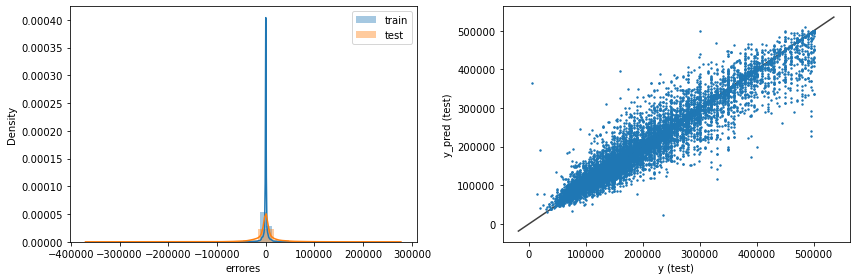

In [139]:
xg_over = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=15,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=500, n_jobs=16, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
xg_over.fit(X_train,y_train)
model_ev(X_train,X_test,y_train,y_test, xg_over)

In [140]:
# scores = cross_val_score(xg_over, X, y, cv=10, scoring='neg_mean_absolute_error')
# scores.mean()*-1

#### Resultado

In [141]:
xg_overfitted_res = resultados(df_d.shape[0],df_d.shape[1],"XGBoost_overfitted","optimizados")
xg_overfitted_res

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,59212,13,XGBoost_overfitted,optimizados,2069.742875,13768.270166


### Modelo (not-overfitted)

RMSE Train: 22209.625727120463

RMSE Test: 29434.814178828427

MAE Train: 15056.55022200257

MAE Test: 19191.679314004974



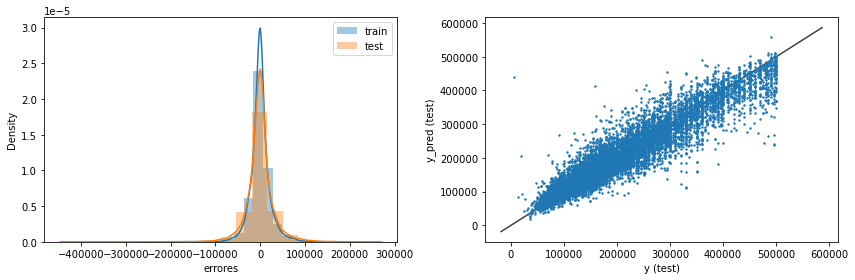

In [142]:
# Cambiamos algunos hiperparametros para disminuir varianza:

# max_depth: 15 -> 5
# gamma: 0.4 -> 1
# min_child_weight: 1 -> 5

xg_not = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=5, monotone_constraints='()',
             n_estimators=500, n_jobs=16, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
xg.fit(X_train,y_train)
model_ev(X_train,X_test,y_train,y_test, xg_not)

#### Resultado

In [143]:
xg_notoverfitted_res = resultados(df_d.shape[0],df_d.shape[1],"XGBoost_notoverfitted","optimizados")
xg_notoverfitted_res

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,59212,13,XGBoost_notoverfitted,optimizados,15056.550222,19191.679314


### Modelo(df_c)

RMSE Train: 2199.468293712194

RMSE Test: 34340.92658944291

MAE Train: 388.2303852819118

MAE Test: 20480.453678064732



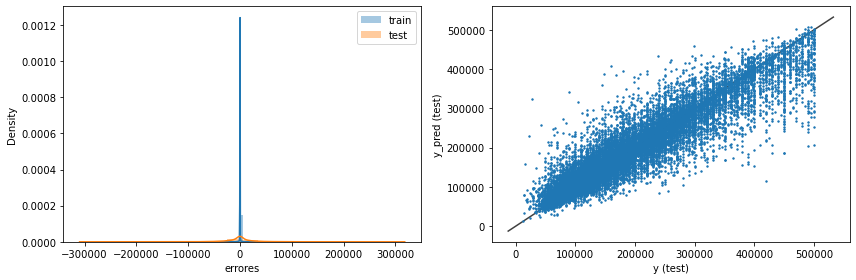

In [144]:
X = df_c.drop(columns=["price"])
y = df_c.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
xg_c = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=15,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=500, n_jobs=16, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
xg_c.fit(X_train,y_train)
model_ev(X_train,X_test,y_train,y_test, xg_c)

In [145]:
xg_c = resultados(df_d.shape[0],df_d.shape[1],"XGBoost_c","optimizados")
xg_c

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,59212,13,XGBoost_c,optimizados,388.230385,20480.453678


## Resultados

In [146]:
res_finales = pd.concat([dtr_viejo,dtr_d,
                        rf_bench_res,rf_res,rf_c_res,rf_c_opt_res, 
                        lr_res,ridge_res,lasso_res,
                        xg_bench_res, xg_overfitted_res, xg_notoverfitted_res, xg_c

                         ])
res_finales.reset_index(drop=True)

,nº Instancias,nº Variables,Modelo,HP,mae_train,mae_test
0,77601,4,DTR,max_depth=9,47512.913253,50331.702880
1,59212,13,DTR_reducido,max_depth=9,25981.876816,27339.926670
2,59212,13,RandomForest_bench,max_depth= None,6358.381352,14734.084864
3,59212,13,RandomForest_d,max_depth=10 y optimizado,22035.653255,23616.938543
4,83913,23,RandomForest_c,max_depth= None,7427.019853,19694.442702
5,83913,23,RandomForest_c_opt,max_depth=10 y optimizado,28264.521598,29975.315816
6,59212,13,Regresion lineal simple,-,30007.769434,30267.471121
7,59212,13,Ridge,alpha=20,30010.568062,30268.942686
8,59212,13,Lasso,alpha=0.1,30011.076476,30271.463891
9,59212,13,XGBoost_bench,no optimizados,18253.315950,20979.869624


In [147]:
seleccion = pd.concat([rf_bench_res,rf_res, xg_overfitted_res, xg_notoverfitted_res])
seleccion.drop(columns=(["nº Instancias","nº Variables"]), inplace=True)
seleccion.sort_values("mae_test",inplace=True)
seleccion.reset_index(drop=True)

,Modelo,HP,mae_train,mae_test
0,XGBoost_overfitted,optimizados,2069.742875,13768.270166
1,RandomForest_bench,max_depth= None,6358.381352,14734.084864
2,XGBoost_notoverfitted,optimizados,15056.550222,19191.679314
3,RandomForest_d,max_depth=10 y optimizado,22035.653255,23616.938543


In [148]:
df.drop(columns=var_cat, inplace=True)
df.dropna(inplace=True)

X = df.drop(columns="price")
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [149]:
models = [rf, rf_opt, xg_over, xg_not]

In [150]:
def model_ev2(models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
  
  global mae_train, mae_test, y_test_pred,y_train_pred, res_models

  res_models = []

  for model in models:

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train) 
    y_test_pred = model.predict(X_test)
    mae_train = mean_absolute_error(y_train,y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    dataf = pd.DataFrame({
                        "Modelo": [model],
                        "mae_train":[mae_train],
                        "mae_test":[mae_test],
                        })
    res_models.append(dataf)
    
  final = pd.DataFrame(np.concatenate(res_models), columns=["Modelo","mae_train","mae_test"])
  final.sort_values("mae_test",inplace=True)
  final.reset_index(drop=True, inplace=True)
  return final

In [151]:
model_ev2(models)

,Modelo,mae_train,mae_test
0,"(DecisionTreeRegressor(max_features='auto', ra...",12507.321378,29051.027896
1,"XGBRegressor(base_score=0.5, booster='gbtree',...",3373.373383,29612.978017
2,"XGBRegressor(base_score=0.5, booster='gbtree',...",38303.656827,45503.664526
3,"(DecisionTreeRegressor(max_depth=10, max_featu...",45588.428625,48009.37928


## Interpretacion
Si bien los modelos con menor MAE presentan mucho overfitting, estos tienen el mejor puntaje para los conjuntos de validacion. Estos son datos que el modelo nunca vio, asi que teoricamente deberian ser los modelos que mejor predigan datos nuevos.

- Para el dataframe df_d que implica propiedades de un precio igual o menor a 500000 uds y que sean departamentos de Capital Federal, el mejor modelo es el de XGBoostRegressor(xg_over) con los hiperparametros optimizados. Presenta un mae_test de 13768.

- Finalmente para el caso en que la propiedad no cumpla esas condiciones, se probaron los mejores modelos para el dataframe mas generico de todos (df), el cual tiene las variables numericas sin ningun otro filtro ni preprocesamiento mas que quitar los valores faltantes. En este caso el mejor modelo fue el RandomForestRegressor con hiperparametros por defecto, con un mae_test de 29051.

- Estos modelos presentan una mejora considerable en comparacion al DecisionTreeRegressor que utilizamos en la primera parte.

In [152]:
mejora =((res_finales.mae_test.iloc[1]  - res_finales.mae_test.iloc[10])/diferencia.mae_test.iloc[1])*100
print(f"El modelo de XGBOOST mejoro un {mejora} % el MAE, respeto al DTR anterior")

El modelo de XGBOOST mejoro un 40.23542035797188 % el MAE, respeto al DTR anterior


# Interpretacion de Modelos

### XGBoost
Este es un modelo de boosting, es decir que fue aprendiendo de errores (a diferencia de los modelos de ensambles), y parece funcionar bien para datasets con poca varianza y features relevantes. Asi es que vemos que este modelo funciono muy bien para el dataframe df_d, y le dio importancia sobre todo las categorias de los barrios, a las superficies de las propiedades, y a los baños.
Este coincide con lo que uno puede esperar con este dataset, ya que los barrios de Capital Federal determinan mucho el precio de las propiedades, y tambien logicamente su superficie. Quizas algo inesperado es considerar como importante la cantidad de baños.


#### Importancias

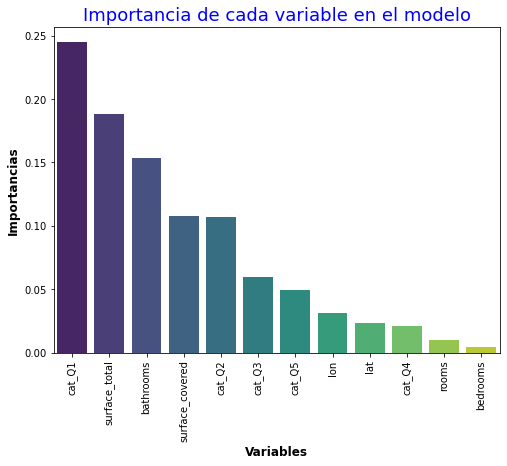

In [153]:
X = df_d.drop(columns=["price"])
y = df_d.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
xg_over.fit(X_train, y_train)
y_train_pred = xg_over.predict(X_train) 
y_test_pred = xg_over.predict(X_test)

plt.figure(figsize = (8, 6))
sns.barplot(data= pd.DataFrame({
    "Variables": X.columns,
    "importancias": xg_over.feature_importances_}).sort_values("importancias", ascending= False),
            x = "Variables", y = "importancias", palette= "viridis")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.ylabel("Importancias", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "b")
plt.xticks(rotation=90, size=10)
plt.show()

#### Errores
Para enteder como falla el modelo comparamos el conjunto de validacion real contra el predicho. Tengamos en cuenta que el KDE(kernel density estimation) funciona como una agrupacion de las observaciones para cada valor, creando una curva continua en el histograma. De esta forma podemos definir intervalos donde si el conjunto de prediccion (test_predict) tiene una densidad mayor a la del conjunto de validacion (test), el modelo tiende a fallar considerando que hay mas propiedades en esos precios. Esto lo podemos ver claramente desde el precio de $90k a $140k, y luego de $170k a $230k, en valores aproximados.

El caso contrario lo podemos ver desde los $40k a los $100k, y $450k a $530, donde al ser mayor la densidad del conjunto de validacion que el de prediccion, el modelo falla asumiendo que hay una menor cantidad de propiedades en esos precios.

Estos intervalos, por ende , pueden entenderse como los rangos de precios donde el modelo mas tiende a fallar.
Para las propiedades de menor precio es posible que el modelo las este sobrevalorando. Esto explicaria porque al principio la densidad de la prediccion es menor, para luego pasar a ser mayor cuando pasa los $100k. Por ejemplo predice que una propiedad de 60k vale 80k y una de 80k vale 110k. 
Lo contrario pasa al final donde tiene mayor densidad alrededor de los 400k y luego de los 450k baja. Esto puede ser porque este infravalorando las propiedades mas caras.
Soluciones para estos errores pueden ser conseguir mas datos de estos tipos de propiedades, encontrar variables que las definan mejor, o simplemente filtrarlas aunque no seria lo mas conveniente.


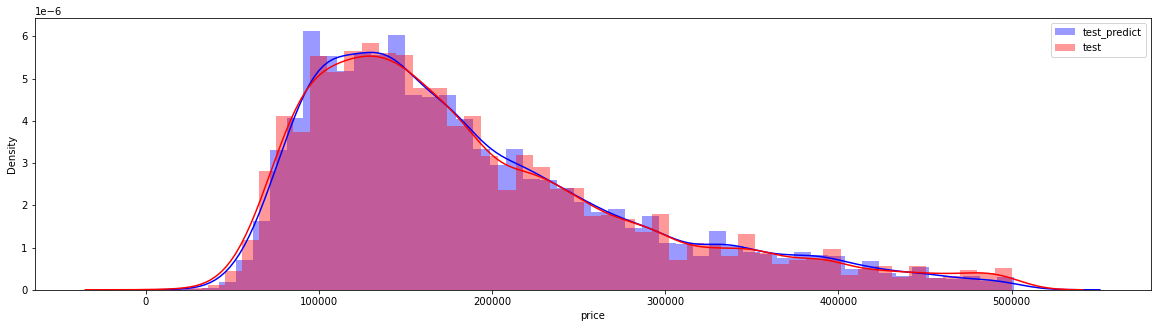

In [154]:
plt.figure(figsize=(20,5))
sns.distplot(y_test_pred, label= "test_predict",color="blue")
sns.distplot(y_test, label="test", color="red")
plt.legend()

## RandomForest

Siendo un modelo de ensamblaje, este se adapta mejor a la varianza de los datos. Esto lo vimos probandolo con el dataframe con mucha varianza en el caso de dataframe "df", e incluso en el que habia sido filtrado y tambien agregado variables nuevas. Nuevamente nos toma por sorpresa la variable de "bathrooms" en este caso siendo la mas importante, el resto eran las que mismas que vienen siendo importante desde el primer proyect: superficies, lat y lon.



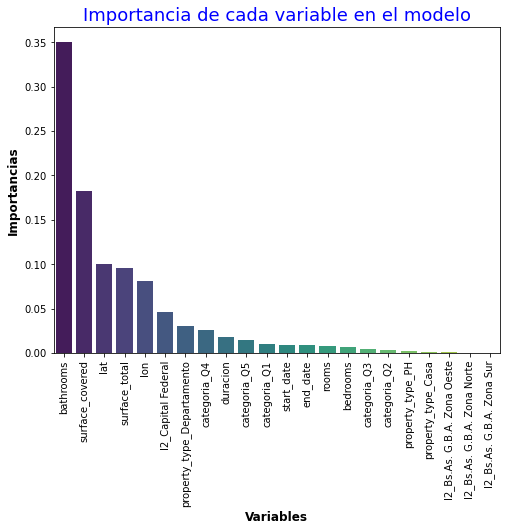

In [155]:
X = df_c.drop(columns="price")

plt.figure(figsize = (8, 6))
sns.barplot(data= pd.DataFrame({
    "Variables": X.columns,
    "importancias": rf_c.feature_importances_}).sort_values("importancias", ascending= False),
            x = "Variables", y = "importancias", palette= "viridis")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.ylabel("Importancias", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "b")
plt.xticks(rotation=90, size=10)
plt.show()

### Importancias random

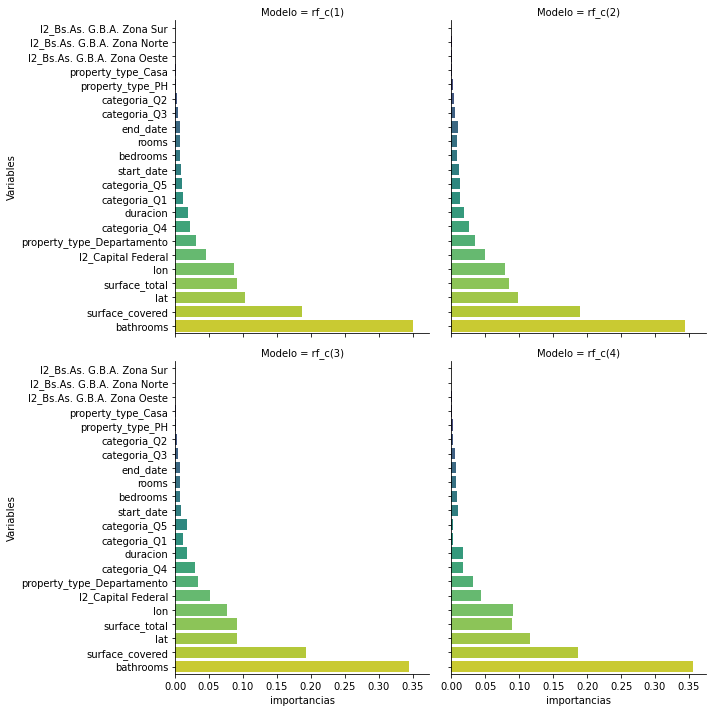

In [156]:
sns.catplot(data = pd.concat([
                pd.DataFrame({
                'Modelo': 'rf_c(1)',
                "Variables": X.columns,
                "importancias": rf_c.estimators_[pd.DataFrame(rf_c.estimators_).sample(4).index[0]].feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'rf_c(2)',
                    "Variables": X.columns,
                    "importancias": rf_c.estimators_[pd.DataFrame(rf_c.estimators_).sample(4).index[1]].feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'rf_c(3)',
                    "Variables": X.columns,
                    "importancias": rf_c.estimators_[pd.DataFrame(rf_c.estimators_).sample(4).index[2]].feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'rf_c(4)',
                    "Variables": X.columns,
                    "importancias": rf_c.estimators_[pd.DataFrame(rf_c.estimators_).sample(4).index[3]].feature_importances_}).sort_values("importancias", ascending= True)
                ]),
            y= 'Variables',
            x= 'importancias',
            kind= 'bar',
            col= 'Modelo',
            col_wrap=2, 
            palette= "viridis")

### Errores
Sucede lo mismo que en el modelo de XGBoost

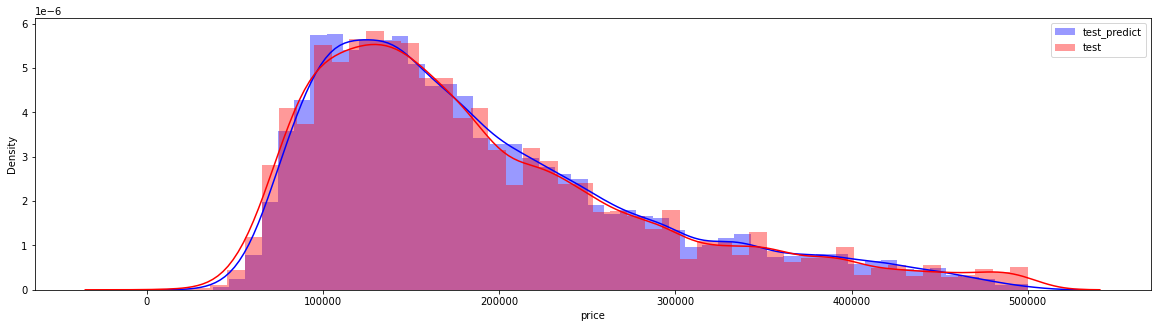

In [157]:
rf_c.fit(X_train, y_train)
y_train_pred = rf_c.predict(X_train) 
y_test_pred = rf_c.predict(X_test)

plt.figure(figsize=(20,5))
sns.distplot(y_test_pred, label= "test_predict",color="blue")
sns.distplot(y_test, label="test", color="red")
plt.legend()

# Cierre

En el analisis exploratorio de datos al crear la variable "duracion", y hacer un scatterplot de la misma, pude ver que la varianza de los precios de las propiedades aumenta al pasar los 200 dias de la publicacion. Si bien esto no termino aportando a la prediccion del modelo, puede ser un dato util para la empresa inmobiliaria.

Una segunda observacion fue que categorizar los barrios le sirvio bastante a los modelos para predecir el precio, incluso se podria probar que pasaria si se trata como una variable ordinal en vez de hacer get_dummies. 
Reducir el rango del precio hizo que mejoren considerablemente los errores de los modelos en general.
Una sorpresa fue que ambos modelos dieron mucha importancia a la variable "bathrooms" y esto podria ser de utilidad en un futuro modelado.

 Es importante considerar que el modelo que mejor funciono fue el que tuvo en cuenta solo departamentos de Capital Federal, de un precio menor o igual a $500k, y esto se debe a que la mayoria de las instancias tenian estas caracteristicas. Si la inmobiliaria quisiera poder predecir mejor el precio de propiedades que no sean de estas caracteristcas seria recomendable adquirir mas datos de estas. En caso contrario ya vimos que el modelo que mejor se adapto a esto fue el RandomForestRegressor, pero con un error considerable.



# Adicional

## Transformacion distinta
Vamos a probar en vez de hacer One-Hot Encoding de la categorizacion de barrios, tratarla como una variable ordinal.

In [158]:
df = raw.drop(columns=["created_on","l1","operation_type","currency","title","description"])
df_ad = df[
          (df.lat < 80) & 
          (df.lon > -180) &
          (df.rooms <= 13) & 
          (df.bedrooms <= 8) & 
          (df.bathrooms <= 14) & 
          (df.surface_total <2000) & (df.surface_total > 15) & 
          (df.surface_covered < 2000) & (df.surface_covered > 15) & 
          (df.surface_covered <= df.surface_total) & 
          (df.price <= 500000)  &
          (df.property_type.isin(["Departamento"])) &
          (df.l2 == "Capital Federal")
          ]
print(df_ad.shape)
df_ad.isna().sum()

(59212, 13)


start_date         0
end_date           0
lat                0
lon                0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [159]:
df_ad["m2"] = df_ad.price / df_ad.surface_covered
media2 = df_ad[["m2","l3"]].groupby("l3").agg(pd.Series.mean)
media2 = media2.to_dict()["m2"]
df_ad.l3 = df.l3.map(media2)
df_ad.drop(columns=["m2","start_date","end_date","l2","property_type"], inplace=True)

In [160]:
cuantis2  = pd.qcut(df_ad.l3, 5, labels=["Q1","Q2","Q3","Q4","Q5"])
df_ad["cat"] = cuantis2
df_ad.head(1)


,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,cat
0,-34.60588,-58.384949,2247.493086,7.0,7.0,2.0,140.0,140.0,153000.0,Q1


In [161]:
dicc ={ "Q1": 1,
        "Q2": 2,
        "Q3": 3,
        "Q4": 4,
        "Q5": 5        
         }

In [162]:
df_ad["cat"] = df_ad.cat.map(dicc)

In [163]:
df_ad.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,cat
0,-34.605880,-58.384949,2247.493086,7.0,7.0,2.0,140.0,140.0,153000.0,1
11,-34.603683,-58.381557,2460.568311,2.0,1.0,1.0,68.0,59.0,149000.0,1
12,-34.630349,-58.417223,2460.568311,2.0,1.0,1.0,50.0,44.0,115000.0,1
20,-34.608246,-58.444262,2687.702153,2.0,1.0,1.0,31.0,31.0,75000.0,2
21,-34.603890,-58.410998,2687.702153,1.0,1.0,1.0,22.0,22.0,48000.0,2


In [164]:
df_ad.dtypes


lat                 float64
lon                 float64
l3                  float64
rooms               float64
bedrooms            float64
bathrooms           float64
surface_total       float64
surface_covered     float64
price               float64
cat                category
dtype: object

In [165]:
df_ad.cat = df_ad.cat.astype("int")

In [166]:
X = df_ad.drop(columns="price")
y = df_ad.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

RMSE Train: 5223.443486115298

RMSE Test: 26391.28674046212

MAE Train: 2035.9208883297672

MAE Test: 13904.888625476737



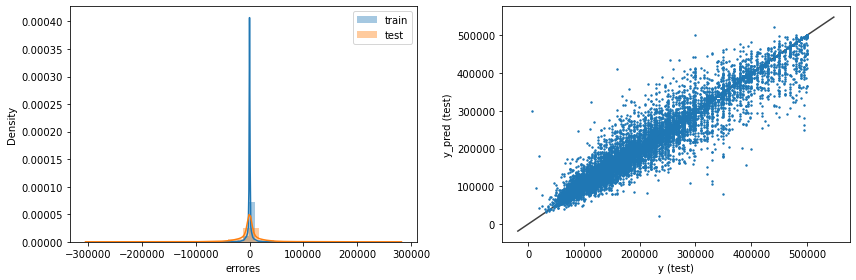

In [167]:
xg_over.fit(X_train,y_train)
model_ev(X_train,X_test,y_train,y_test,xg_over)

### Resultado
El resultado es practicamente igual, aunque ligeramente peor, que haber hecho One-Hot Encoding.